<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_6_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#linear regression
#mean squared error ==> choose as a loss function
#finding minimizing MSE == finding best line of regression
#y= ax+b ==>MSE를 a로 또는 b로 편미분해도 0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hubble=pd.read_csv("/content/hubble1.csv",names=['x','y'])

hubble



,x,y
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [5]:
#허블상수 얻기
x=hubble['x']
y=hubble['y']
#y= ax+b ==> sigma (y-<y>)^2 :MSE
#MSE를 편미분을 해서 0 이 되는 것으로 찾아낸 linear square methods
a=(np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
#slope
b=(np.mean(x**2)*np.mean(y)-np.mean(x*y)*np.mean(x))/(np.mean(x**2)-np.mean(x)**2)
#intercept
print("a=",a)
print("b=",b)

a= 454.1584409226284
b= -40.78364909586029


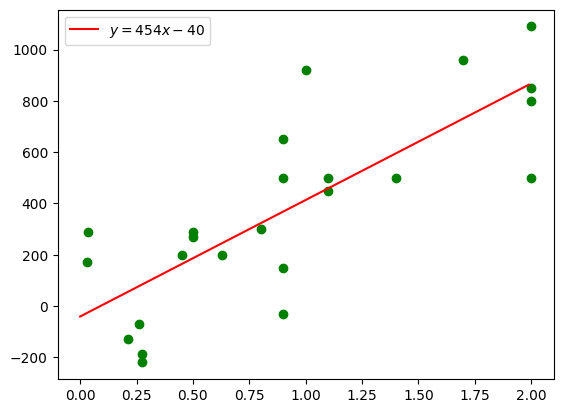

In [6]:
plt.scatter(x,y,c="green")
xs=np.arange(0,2,0.01)
ys=a*xs+b

plt.plot(xs,ys,c="r",label="$y = 454x-40$")
plt.legend()

In [7]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=454.15844092262836, intercept=-40.78364909586037, rvalue=0.7896394879353181, pvalue=4.477491000609205e-06, stderr=75.23710534716912, intercept_stderr=83.43886993606563)

In [14]:
#Gradient Descent method
def MSE(a,b,x,y):
  return np.mean((a*x+b-y)**2)
#적게 잡고자 하는 함수(loss func.)

def dEda(a,b,x,y,delta):
  return (MSE(a+delta,b,x,y)-MSE(a,b,x,y))/delta
#함수의 a로의 미분(직접 계산도 할수있음)
def dEdb(a,b,x,y,delta):
  return (MSE(a,b+delta,x,y)-MSE(a,b,x,y))/delta
#함수의 a로의 미분(직접 계산도 할수있음)


err = 1     #적당히 큰 초기값
#errTol=1e-4 #루프를 멈추는 기준
errTol=1e-1
#a,b=500,0   #초기값
a,b=10,0
#eta=0.001   #learning rate
eta=0.1
delta =0.01

while err>errTol:
  a_next= a - eta*dEda(a,b,x,y,delta)
  b_next= b - eta*dEda(a,b,x,y,delta)
  err = max(abs(a_next), abs(b_next))
  a,b=a_next,b_next
print("a=",a)
print("b=",b)
#존나 오래 걸려서 안함

KeyboardInterrupt: 

In [17]:
import numpy as np

def MSE(a, b, x, y):
    return np.mean((a * x + b - y) ** 2)

def dEda(a,b,x,y,delta):
  return (MSE(a+delta,b,x,y)-MSE(a,b,x,y))/delta
#함수의 a로의 미분(직접 계산도 할수있음)
def dEdb(a,b,x,y,delta):
  return (MSE(a,b+delta,x,y)-MSE(a,b,x,y))/delta
#함수의 a로의 미분(직접 계산도 할수있음)

# 예제 데이터 (x, y)
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100) * 0.1  # 진짜 매개변수 a=2, b=1, 잡음 추가

# 초기화
a, b = 0.0, 0.0
eta = 0.01  # 학습률
errTol = 1e-4
prev_err = float('inf')
delta =0.01
while True:
    grad_a = dEda(a, b, x, y,delta)
    grad_b = dEdb(a, b, x, y,delta)

    # 매개변수 업데이트
    a -= eta * grad_a
    b -= eta * grad_b

    # 오류 계산 및 수렴 확인
    err = MSE(a, b, x, y)
    if abs(prev_err - err) < errTol:
        break
    prev_err = err

print("a =", a)
print("b =", b)


a = 1.2816137924156759
b = 1.3970045449910629


In [10]:
fish=pd.read_csv('/content/fish.txt',delimiter='\t')

fish

,Code_ID,Stream,Location,Family,Genus,Species,Scientific_name,Length_mm,Mass_g
0,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,442,1700.0
1,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,405,1220.0
2,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,373,1040.0
3,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,199,139.9
4,1,Ebro,Miranda de Ebro,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,225,133.0
...,...,...,...,...,...,...,...,...,...
12283,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,6.9
12284,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,7.4
12285,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,110,19.8
12286,118,Ebro,Batea,Cyprinidae,Parachondrostoma,miegii,Parachondrostoma miegii,63,2.8


Text(0, 0.5, 'Mass')

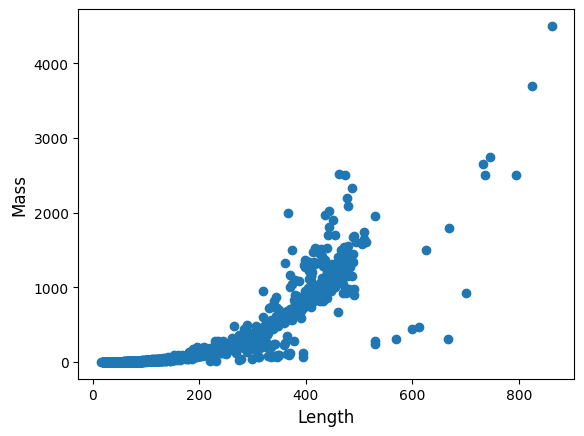

In [11]:
m=fish['Length_mm']
g=fish['Mass_g']
#hypothesis : M ~ L^3
#ln(M) ~ 3ln(L) : linear
plt.scatter(m,g)
plt.xlabel('Length',fontsize=12)
plt.ylabel('Mass',fontsize=12)


Text(0, 0.5, 'log Mass')

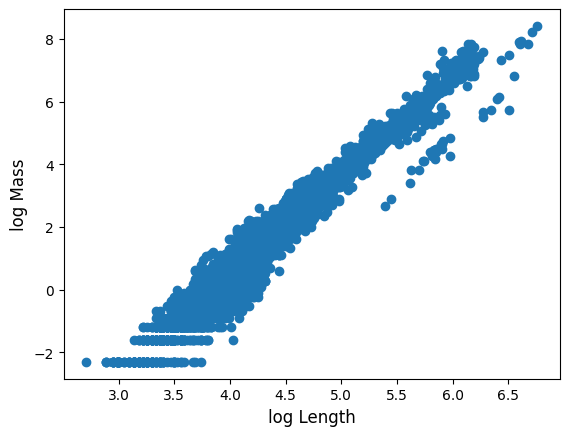

In [12]:
x = np.log(m)
y = np.log(g)
plt.scatter(x,y)
plt.xlabel('log Length',fontsize=12)
plt.ylabel('log Mass',fontsize=12)
#leat square method로 풀기에는 숫자가 커질수록 값의 다르기가 너무 큼

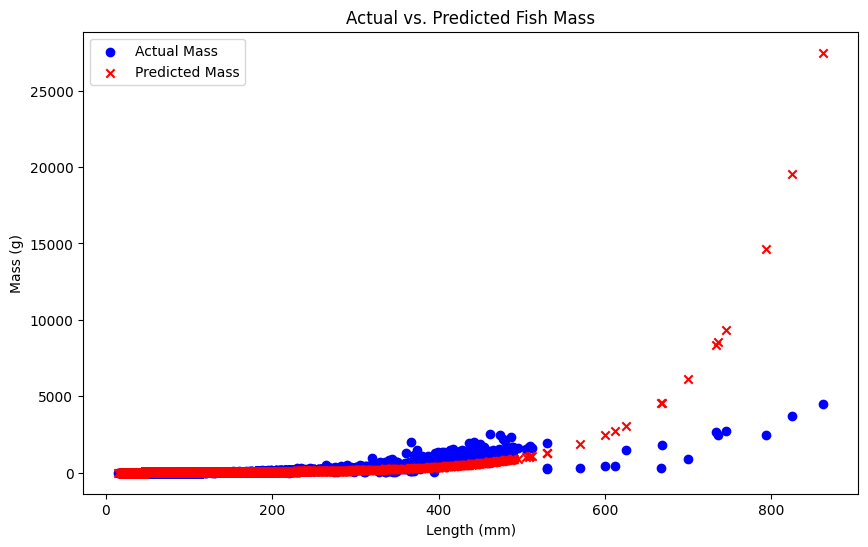

In [18]:
#Maximum likelihood Estimation

#PIi_p(xi) ==likelihood func.

#SIGMAi_ln(p(xi)) == log likelihood func.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 데이터 로드
fish = pd.read_csv('/content/fish.txt', delimiter='\t')
x = fish['Length_mm']
y = fish['Mass_g']

# 포아송 회귀 모델을 위한 준비
x = sm.add_constant(x)  # 상수항 추가

# 포아송 회귀 모델 생성 및 학습
poisson_model = sm.GLM(y, x, family=sm.families.Poisson()).fit()

# 모델의 예측값 계산
fish['predicted_mass'] = poisson_model.predict(x)

# 실제 데이터와 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.scatter(fish['Length_mm'], fish['Mass_g'], color='blue', label='Actual Mass')
plt.scatter(fish['Length_mm'], fish['predicted_mass'], color='red', marker='x', label='Predicted Mass')
plt.title('Actual vs. Predicted Fish Mass')
plt.xlabel('Length (mm)')
plt.ylabel('Mass (g)')
plt.legend()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive
